<ipython-input-5-f5ca1527a726>:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)  # No fully connected layer


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,571,778 (13.63 MB)

 Trainable params: 3,537,666 (13.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

Saving catee.jpg to catee.jpg


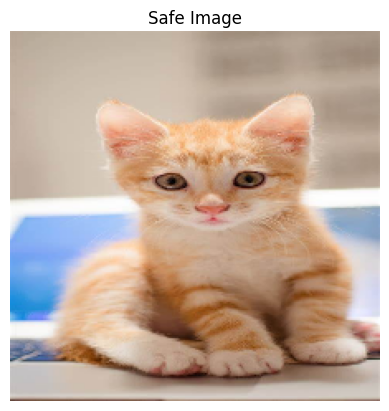

In [ ]:
# Install required libraries
!pip install tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False)  # No fully connected layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Binary classification (safe vs. phishing)

# Compile model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# This example assumes you already have a dataset of phishing and non-phishing images.
# For demonstration purposes, we will use a few dummy images here.
# Note: In a real scenario, you should load and train this model on a dataset of phishing vs non-phishing images.

# Example function to predict if an image is phishing
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    preds = model.predict(img_array)
    phishing_prob = preds[0][0]
    non_phishing_prob = preds[0][1]

    if phishing_prob > non_phishing_prob:
        result = "Phishing Detected (Unsafe)"
    else:
        result = "Safe Image"

    # Display result
    plt.imshow(img)
    plt.title(result)
    plt.axis("off")
    plt.show()

# For demonstration, we simulate the model's behavior with random predictions.
# Please replace this section with actual model training or loaded weights for real usage.

# Create a function to simulate predictions
def simulate_phishing_prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Simulate predictions for demonstration
    phishing_prob = np.random.rand()
    non_phishing_prob = 1 - phishing_prob

    if phishing_prob > non_phishing_prob:
        result = "Phishing Detected (Unsafe)"
    else:
        result = "Safe Image"

    # Display result
    plt.imshow(img)
    plt.title(result)
    plt.axis("off")
    plt.show()

# Test the function with an image (upload an image to Colab first)
from google.colab import files
uploaded = files.upload()

# Predict on uploaded image
for img_name in uploaded.keys():
    simulate_phishing_prediction(img_name)




In [3]:
!pip install speechrecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 50.0 MB/s eta 0:00:00


In [5]:
!pip install pydub

In [6]:
import speech_recognition as sr
from google.colab import files
from pydub import AudioSegment
import os

# Function to upload an audio file from user
def upload_audio_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"Processing file: {filename}")
        return filename

# Function to convert MP3 to WAV format
def convert_mp3_to_wav(mp3_filename):
    wav_filename = mp3_filename.replace('.mp3', '.wav')
    audio = AudioSegment.from_mp3(mp3_filename)
    audio.export(wav_filename, format="wav")
    return wav_filename

# Function to convert audio file to text using SpeechRecognition
def classify_audio_file(filename):
    recognizer = sr.Recognizer()
    with sr.AudioFile(filename) as source:
        audio = recognizer.record(source)  # Read the entire audio file

    try:
        # Convert audio to text using Google's Speech Recognition
        text = recognizer.recognize_google(audio)
        print(f"Text from file: {text}")
        return text
    except sr.UnknownValueError:
        return "Could not understand the audio from the file."
    except sr.RequestError as e:
        return f"Error with the speech recognition service: {e}"

# Function to classify the text (safe/unsafe based on phishing keywords)
def classify_text(text):
    # Define simple phishing keywords
    phishing_keywords = ["urgent", "bank account", "login", "password", "click this link", "provide details"]

    # Check if any phishing keywords are found in the text
    for keyword in phishing_keywords:
        if keyword.lower() in text.lower():
            return "Unsafe: Phishing detected!"

    return "Safe: No phishing detected."

# Function to classify uploaded audio file (MP3 or WAV) as phishing or not
def file_phishing_detection():
    filename = upload_audio_file()  # Upload and process file

    # If MP3 file is uploaded, convert it to WAV
    if filename.endswith('.mp3'):
        filename = convert_mp3_to_wav(filename)
        print(f"Converted {filename} to WAV format.")

    if filename.endswith('.wav'):
        text = classify_audio_file(filename)  # Get text from the audio file
        result = classify_text(text)  # Classify the text as safe or unsafe
        print(result)
    else:
        print("Please upload a .mp3 or .wav file.")

    # After processing, prompt the user to upload another file
    print("\nNext, please upload another audio file for analysis.")
    file_phishing_detection()

# Start the process by calling the function
file_phishing_detection()


Saving Vaathi Coming.mp3 to Vaathi Coming.mp3
Processing file: Vaathi Coming.mp3
Converted Vaathi Coming.wav to WAV format.
Safe: No phishing detected.

Next, please upload another audio file for analysis.


KeyboardInterrupt: 

In [7]:
!pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.7 MB/s eta 0:00:00


In [8]:
import requests
import tldextract

def check_https(url):
    return url.startswith('https://')

def is_suspicious_domain(url):
    ext = tldextract.extract(url)
    # Check if the domain is suspicious (e.g., subdomains are common in phishing)
    suspicious_keywords = ['login', 'secure', 'account', 'verify']
    return any(keyword in ext.domain for keyword in suspicious_keywords)

def detect_phishing(url):
    # Check if the URL is secure (https)
    if not check_https(url):
        return "Potential Phishing: No HTTPS"

    # Check for suspicious domain names
    if is_suspicious_domain(url):
        return "Potential Phishing: Suspicious Domain Name"

    # Additional heuristic checks can be added here (e.g., URL length, domain length)
    if len(url) > 100:
        return "Potential Phishing: Long URL"

    return "URL seems safe"

# Test the detector
url = input("Enter a URL to check: ")
result = detect_phishing(url)
print(result)

Enter a URL to check: www.roadmap.sh
Potential Phishing: No HTTPS
